# IMPORTS

## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

## Data

Check len of processed dataframes

In [2]:
from novelty_detection.data import load_data, save_img
from novelty_detection.preprocessing import *

count=0

while True:
    try:
        name = f"gaia_data_{count}.csv"
        df = load_data(name, header_names=None)
        df_date = convert_df_time_column_to_datetime(df)
        df_index = convert_df_to_df_with_datetime_index(df_date)
        idx=df_index.index
        print(name, ', num rows:' ,len(df),', days:', (idx[-1]-idx[0]).days)
    except ValueError:
        break
    count+=1

gaia_data_0.csv , num rows: 2520 , days: 3
gaia_data_1.csv , num rows: 15862 , days: 22
gaia_data_2.csv , num rows: 6991 , days: 9
gaia_data_3.csv , num rows: 2879 , days: 3
gaia_data_4.csv , num rows: 4259 , days: 5
gaia_data_5.csv , num rows: 3576 , days: 4
gaia_data_6.csv , num rows: 2106 , days: 2
gaia_data_7.csv , num rows: 1011 , days: 1
gaia_data_8.csv , num rows: 1643 , days: 2
gaia_data_9.csv , num rows: 4157 , days: 5
gaia_data_10.csv , num rows: 1486 , days: 2


Load one of the preprocessed dataframes: for example the larger one

In [13]:
data_to_load = "gaia_data_1.csv"

df = load_data(data_to_load, header_names=None)
df_date = convert_df_time_column_to_datetime(df)
df_index = convert_df_to_df_with_datetime_index(df_date)
print(df_index.shape)
df_index.head()

(15862, 12)


,T_ext,Solar_irrad,T_imp,BC1_power,BC2_power,Refr1_power,Refr2_power,BC1_flow,BC2_flow,Refr1_flow,Refr2_flow,T_ret
datetime,,,,,,,,,,,,
2022-05-18 00:02:00+00:00,19.450001,0.0,15.040009,0.2,0.3,0.3,0.3,0.0,0.0,0.0,0.0,15.320007
2022-05-18 00:04:00+00:00,19.450001,0.0,15.070007,0.2,0.3,0.3,0.3,0.0,0.0,0.0,0.0,15.320007
2022-05-18 00:06:00+00:00,19.450001,0.0,14.980011,0.2,0.3,0.3,0.3,0.0,0.0,0.0,0.0,15.260010
2022-05-18 00:08:00+00:00,19.510000,0.0,15.040009,0.2,0.3,0.3,0.3,0.0,0.0,0.0,0.0,15.260010
2022-05-18 00:10:00+00:00,19.510000,0.0,15.110001,0.2,0.3,0.3,0.3,0.0,0.0,0.0,0.0,15.275009


Split the loaded dataframe by  working days (weekends and non working hours are removed):

In [15]:
df_index = remove_specific_day(df_index, '2022-05-25')
dfs_day_working_hours = remove_non_working_hours(df_index, strating_hour='04:58', ending_hour='17:30')

Lets choose the second week for the analysis

In [17]:
df_index = dfs_day_working_hours[-1]
df_index.head()

,T_ext,Solar_irrad,T_imp,BC1_power,BC2_power,Refr1_power,Refr2_power,BC1_flow,BC2_flow,Refr1_flow,Refr2_flow,T_ret
datetime,,,,,,,,,,,,
2022-06-08 04:58:00+00:00,19.57,37.0,9.200012,12.75,15.85,14.60,0.25,2851.0,2548.0,0.0,3340.0,10.290009
2022-06-08 05:00:00+00:00,19.57,39.0,9.260010,12.80,15.80,14.65,0.30,2836.0,2419.0,0.0,3355.0,10.350006
2022-06-08 05:02:00+00:00,19.57,39.0,9.119995,12.75,15.80,14.60,0.25,2649.0,2476.0,0.0,3556.0,10.260010
2022-06-08 05:04:00+00:00,19.57,39.0,9.089996,12.80,15.80,14.60,0.25,3024.0,2419.0,0.0,3225.0,10.290009
2022-06-08 05:06:00+00:00,19.57,39.0,9.230011,12.80,15.75,14.50,0.25,2865.0,2448.0,0.0,3312.0,10.350006


# TIMESERIES PLOTS

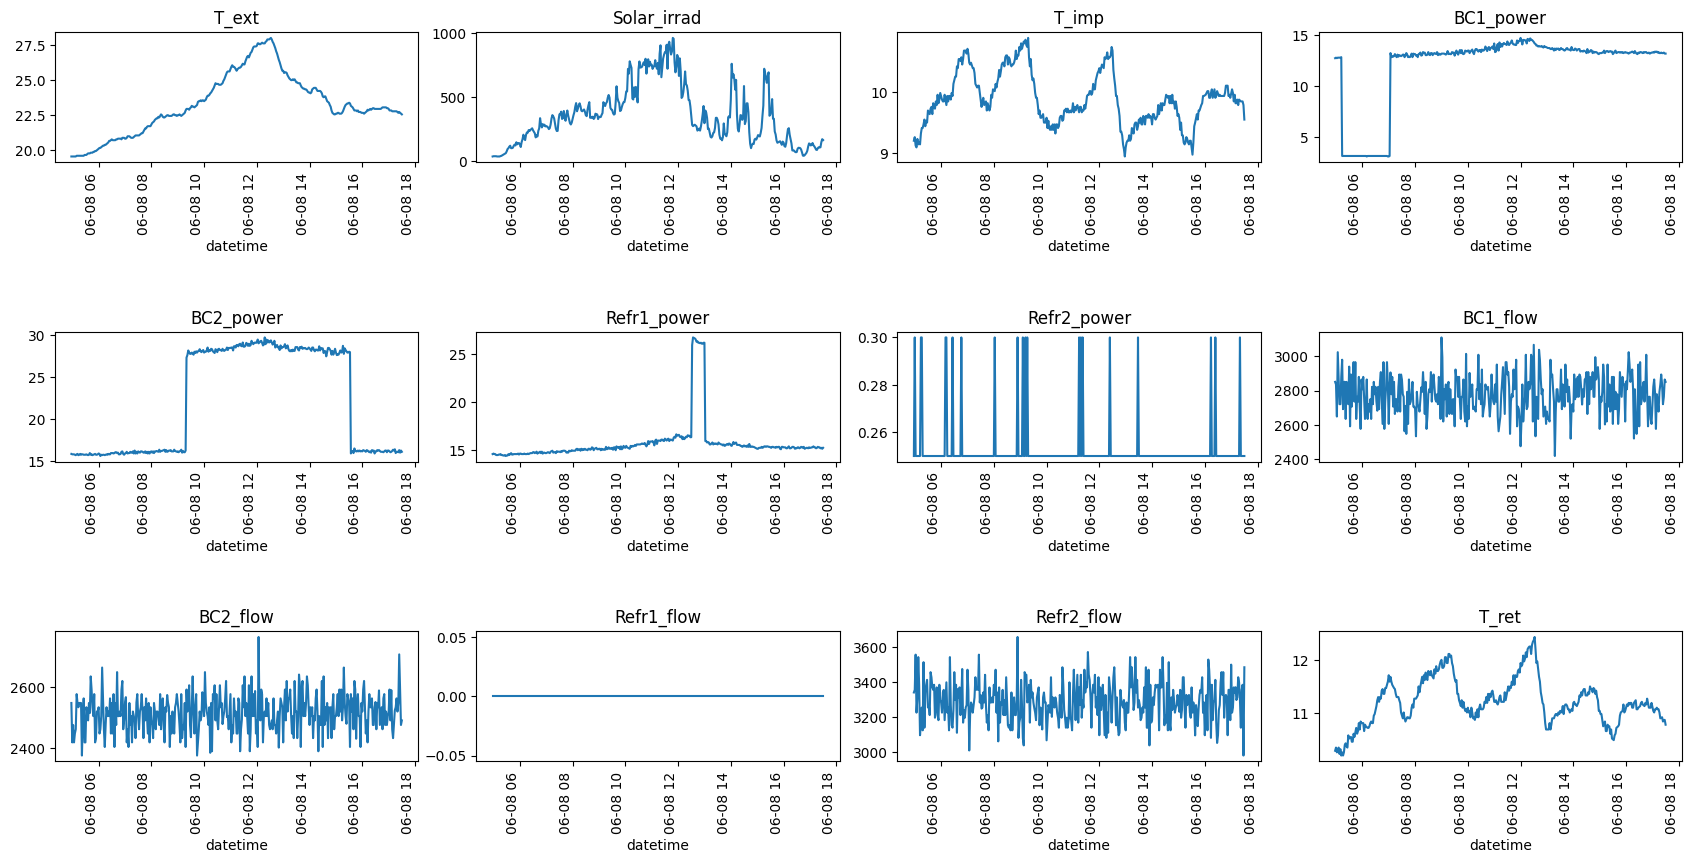

In [18]:
columns = ['T_ext', 'Solar_irrad', 'T_imp', 
           'BC1_power', 'BC2_power', 'Refr1_power', 
           'Refr2_power', 'BC1_flow', 'BC2_flow', 
           'Refr1_flow', 'Refr2_flow', 'T_ret']

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(17, 10))
fig.tight_layout(rect=[0, 0.70, 1, 0.95])
axes = axes.flatten()
for i,col in enumerate(columns):
    df_index[[col]].plot(ax=axes[i], legend=False, title=col, x_compat=True, rot=90,)

# CORRELATION PLOT

The last column of the correlation matrix corresponds to the corralations between T_ret and the other variables

In [19]:
correaltions = df_index.corr(method='pearson').iloc[:-1,-1]
d_correlations = correaltions.to_dict()
d_correlations

{'T_ext': 0.5010803612579859,
 'Solar_irrad': 0.38832758750632984,
 'T_imp': 0.7870524994346111,
 'BC1_power': 0.35523571728312214,
 'BC2_power': 0.21708975260710336,
 'Refr1_power': 0.2130224289902327,
 'Refr2_power': -0.014652086660048087,
 'BC1_flow': 0.041290566997457145,
 'BC2_flow': -0.051235700458642806,
 'Refr1_flow': nan,
 'Refr2_flow': -0.04690826000961759}

In [20]:
columns = ['T_ext', 'Solar_irrad', 'T_imp', 
           'BC1_power', 'BC2_power', 'Refr1_power', 
           'Refr2_power', 'BC1_flow', 'BC2_flow', 
           'Refr1_flow', 'Refr2_flow']

list_of_dict = []

for shift in range(90):
    df_copy=df_index.copy()
    df_copy[columns] = df_copy[columns].shift(shift)
    df_remove = df_copy.iloc[shift:]
    correaltions = df_remove.corr(method='pearson').iloc[:,-1] 
    d_correlations = correaltions.to_dict()
    list_of_dict.append(d_correlations)

df_corr = pd.DataFrame(list_of_dict, columns=list(list_of_dict[0].keys()))

Text(0, 0.5, 'Pearson correlation coefficient')

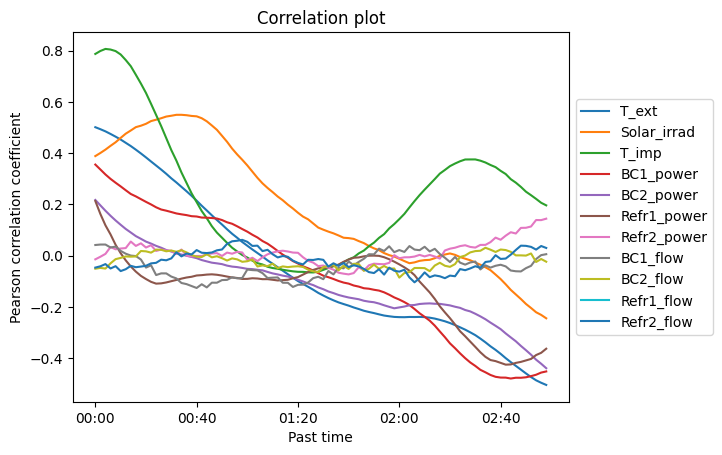

In [21]:
fig, ax = plt.subplots()
df_to_plot = df_corr[columns].reset_index()
df_to_plot['minutes'] = df_to_plot['index'] * 2
df_to_plot['minutes_str'] = pd.to_datetime(df_to_plot['minutes'], unit='m').dt.strftime('%H:%M')
df_to_plot.plot(x='minutes_str', y=columns,ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.title.set_text('Correlation plot')
ax.set_xlabel('Past time')
ax.set_ylabel('Pearson correlation coefficient') 

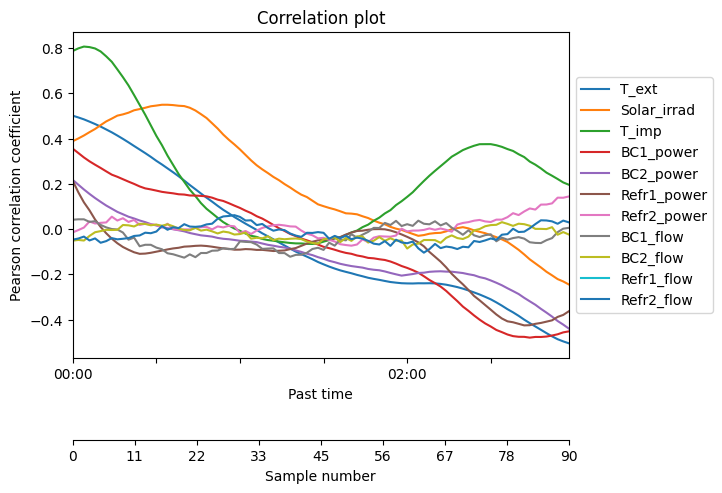

In [23]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

# Add some extra space for the second axis at the bottom
fig.subplots_adjust(bottom=0.2)

df_to_plot = df_corr[columns].reset_index()
df_to_plot['minutes'] = df_to_plot['index'] * 2
df_to_plot['minutes_str'] = pd.to_datetime(df_to_plot['minutes'], unit='m').dt.strftime('%H:%M')
df_to_plot.plot(x='minutes_str', y=columns,ax=ax1)
ax1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax1.title.set_text('Correlation plot')
ax1.set_xlabel('Past time')
ax1.set_ylabel('Pearson correlation coefficient') 
ax1.margins(x=0)
ax1.xaxis.set_major_locator(plt.MaxNLocator(8))

new_tick_locations = np.arange(9)

def tick_function(X):
    X=X*90/8
    return X.astype(np.int64)

# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")

# Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.25))

# Turn on the frame for the twin axis, but then hide all 
# but the bottom spine
ax2.set_frame_on(True)
ax2.patch.set_visible(False)

# as @ali14 pointed out, for python3, use this
# for sp in ax2.spines.values():
# and for python2, use this
for sp in ax2.spines.values():
    sp.set_visible(False)
ax2.spines["bottom"].set_visible(True)

ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(new_tick_locations))
ax2.set_xlabel(f"Sample number")
plt.show()

# FREQUENCY PLOT

The FFT of a real-valued input signal (like all our dataset columns) will produce negative frequencies that are just mirrored duplicates of the positive frequencies, and can thus be ignored when analyzing the result. To ignore them, we only have to ignore the seconf half of the data.

C:\Users\edu12\AppData\Local\Temp\ipykernel_7028\2577913115.py:15: RuntimeWarning: divide by zero encountered in divide
  periods=1/freqs


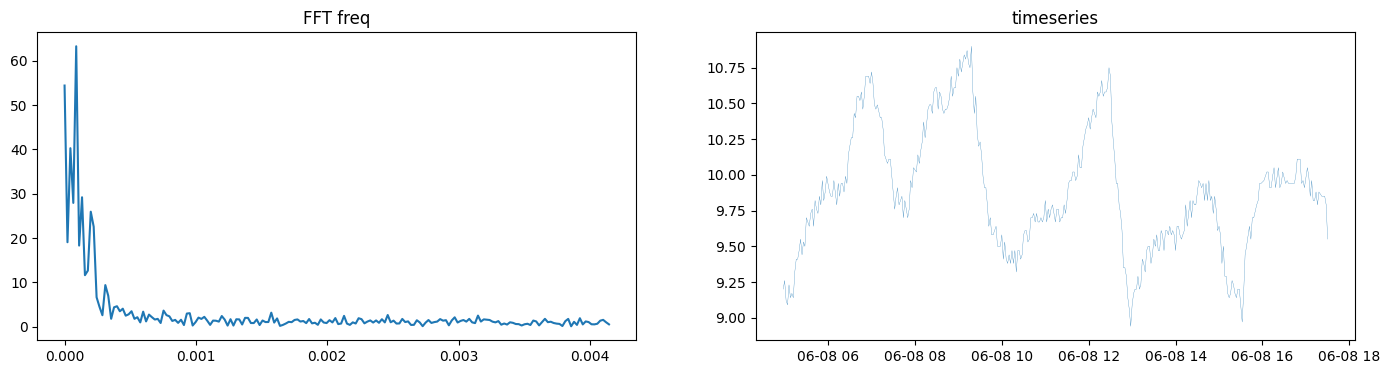

In [28]:
varaible='T_imp'

var_fft = np.fft.fft(df_index[varaible])
var_fft = var_fft[1:]
var_mag = np.abs(var_fft)
frate = 1/120 # seconds
n = len(var_fft)
freqs = np.fft.fftfreq(n, 1./frate) # cycles/second

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 4))

ini=0
var_mag = var_mag[ini:n//2]
freqs = freqs[ini:n//2]
periods=1/freqs

dataset = pd.DataFrame({'period': periods, 'frequency': freqs, 'magnitude':var_mag})
dataset['period_hours'] = dataset['period'] / 3600

axes[0].plot(dataset['frequency'], dataset['magnitude'])
axes[0].title.set_text('FFT freq')
#axes[0].set_xlim([0, 0.00004])

axes[1].plot(df_index.index, df_index[varaible],linewidth=.2)
axes[1].title.set_text('timeseries')



C:\Users\edu12\AppData\Local\Temp\ipykernel_7028\4147309849.py:21: RuntimeWarning: divide by zero encountered in divide
  X=(1/X) / 3600


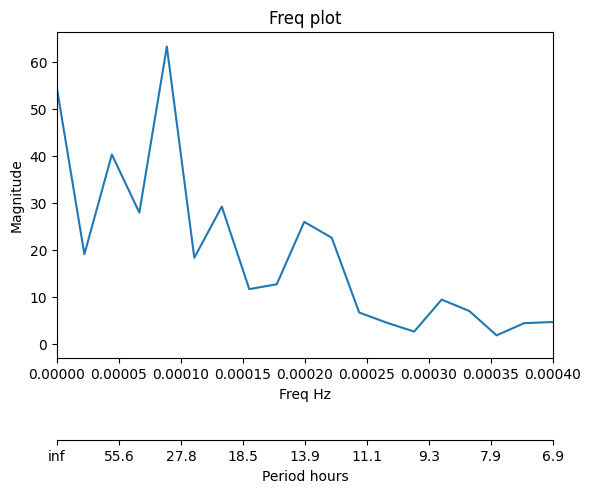

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

# Add some extra space for the second axis at the bottom
fig.subplots_adjust(bottom=0.2)

ax1.plot(dataset['frequency'], dataset['magnitude'])
ax1.title.set_text('Freq plot')
ax1.set_xlabel('Freq Hz')
ax1.set_ylabel('Magnitude') 
ax1.margins(x=0)
ax1.xaxis.set_major_locator(plt.MaxNLocator(8))
ax1.set_xlim([0, 0.0004])

new_tick_locations = np.arange(8+1)

def tick_function(X):
    
    X=X*(4*1e-5)/8
    X=(1/X) / 3600
    X_list=[f"{x:.1f}" if not np.isinf(x) else 'inf' for x in X]
    return np.array(X_list)

# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")

# Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.25))

# Turn on the frame for the twin axis, but then hide all 
# but the bottom spine
ax2.set_frame_on(True)
ax2.patch.set_visible(False)

# as @ali14 pointed out, for python3, use this
# for sp in ax2.spines.values():
# and for python2, use this
for sp in ax2.spines.values():
    sp.set_visible(False)
ax2.spines["bottom"].set_visible(True)

ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(new_tick_locations))
ax2.set_xlabel(f"Period hours")
plt.show()